# RNN vs LSTM

Aim of this short notebook is to show the capabilities of a LSTM neural-network compared to a RNN architecture when it comes to long distance memory patterns. 

The idea is to build a dataset of sequences and to assign a binary label to each sequence. The label is assigned folowing a XOR labelling strategy. For the short memory pattern, the last two elements of the sequence are used to assign the label, for the long memory one the first two.

We will see that the LSTM performs better than the RNN when it comes to figuring out the long memory pattern.

In [1]:
# Import
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

2023-10-19 11:39:11.379109: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Let's build a non linear decision boundary using a XOR strategy: two elements of the sequence are used for labelling.

In [2]:
# Define XOR labelling strategy (non linear decision boundary)
def labelling(x, id1, id2):
  if (x[id1] < 0) & (x[id2] > 0):
    return 1
  elif (x[id1] > 0) & (x[id2] < 0):
    return 1
  else:
    return 0

Let's generate 5000 random sequences of *T* samples from the standard normal distribution with their corresponding short and long memory pattern labels.

In [3]:
# Generate 5000 random sequences and labels
T = 7
D = 1
X = []
Y_short = []
Y_long = []
for i in range(5000):
    x = np.random.randn(T)
    X.append(x)
    y_short = labelling(x, -2, -1)  # short memory: last two elements are used  
    y_long = labelling(x, 0, 1)  # long memory: first two elements are used
    Y_short.append(y_short)
    Y_long.append(y_long)

# Get sequences and label as numpy array
X = np.array(X)
Y_short = np.array(Y_short)
Y_long = np.array(Y_long)
N = len(X)

Let's plot a couple of sequences

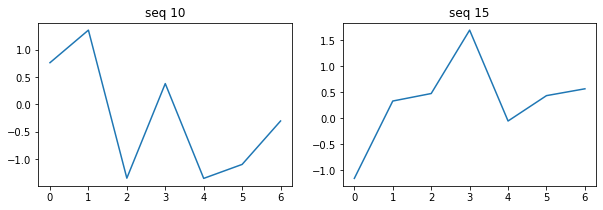

In [4]:
fig, axes = plt.subplots(1, 2, figsize=(10, 3))
axes = axes.flatten()
axes[0].plot(list(range(len(X[9]))), X[9])
axes[1].plot(list(range(len(X[14]))), X[14])
axes[0].set_title("seq 10")
axes[1].set_title("seq 15")
plt.show()

Let's define the models

In [5]:
# RNN model
rnn = tf.keras.models.Sequential()
rnn.add(tf.keras.Input(shape=(T, D)))
rnn.add(tf.keras.layers.SimpleRNN(10))
rnn.add(tf.keras.layers.Dense(1, activation="sigmoid"))

# LSTM model
lstm = tf.keras.models.Sequential()
lstm.add(tf.keras.Input(shape=(T, D)))
lstm.add(tf.keras.layers.LSTM(5))
lstm.add(tf.keras.layers.Dense(1, activation="sigmoid"))

2023-10-19 11:39:16.357374: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Let's print model summaries

In [6]:
# Print rnn summary
rnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 10)                120       
                                                                 
 dense (Dense)               (None, 1)                 11        
                                                                 
Total params: 131
Trainable params: 131
Non-trainable params: 0
_________________________________________________________________


In [7]:
# Print lstm summary
lstm.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 5)                 140       
                                                                 
 dense_1 (Dense)             (None, 1)                 6         
                                                                 
Total params: 146
Trainable params: 146
Non-trainable params: 0
_________________________________________________________________


Let's compile and train the models

In [8]:
# Compile rnn
rnn.compile(
    loss="binary_crossentropy",
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=["accuracy"]
)

# Compile lstm
lstm.compile(
    loss="binary_crossentropy",
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=["accuracy"]
)

First let's check the performances on Y_short

In [9]:
# Train rnn
rnn_res = rnn.fit(
    X, Y_short,
    epochs=50,
    validation_split=0.5
)

# Train lstm
inputs = np.expand_dims(X, -1)
lstm_res = lstm.fit(
    X, Y_short,
    epochs=50,
    validation_split=0.5
)

Epoch 1/50
79/79 [==============================] - 2s 10ms/step - loss: 0.7101 - accuracy: 0.5324 - val_loss: 0.6979 - val_accuracy: 0.5292
Epoch 2/50
79/79 [==============================] - 0s 4ms/step - loss: 0.6919 - accuracy: 0.5360 - val_loss: 0.6892 - val_accuracy: 0.5472
Epoch 3/50
79/79 [==============================] - 0s 4ms/step - loss: 0.6834 - accuracy: 0.5584 - val_loss: 0.6827 - val_accuracy: 0.5720
Epoch 4/50
79/79 [==============================] - 0s 4ms/step - loss: 0.6757 - accuracy: 0.5728 - val_loss: 0.6750 - val_accuracy: 0.5784
Epoch 5/50
79/79 [==============================] - 0s 4ms/step - loss: 0.6653 - accuracy: 0.6016 - val_loss: 0.6656 - val_accuracy: 0.6032
Epoch 6/50
79/79 [==============================] - 0s 4ms/step - loss: 0.6536 - accuracy: 0.6456 - val_loss: 0.6527 - val_accuracy: 0.6436
Epoch 7/50
79/79 [==============================] - 0s 4ms/step - loss: 0.6395 - accuracy: 0.6816 - val_loss: 0.6363 - val_accuracy: 0.6900
Epoch 8/50
79/79 [=

79/79 [==============================] - 0s 6ms/step - loss: 0.5629 - accuracy: 0.8028 - val_loss: 0.5436 - val_accuracy: 0.8192
Epoch 10/50
79/79 [==============================] - 0s 5ms/step - loss: 0.5192 - accuracy: 0.8424 - val_loss: 0.4975 - val_accuracy: 0.8576
Epoch 11/50
79/79 [==============================] - 0s 5ms/step - loss: 0.4720 - accuracy: 0.8824 - val_loss: 0.4516 - val_accuracy: 0.8840
Epoch 12/50
79/79 [==============================] - 0s 5ms/step - loss: 0.4263 - accuracy: 0.9124 - val_loss: 0.4081 - val_accuracy: 0.9036
Epoch 13/50
79/79 [==============================] - 0s 6ms/step - loss: 0.3844 - accuracy: 0.9328 - val_loss: 0.3706 - val_accuracy: 0.9168
Epoch 14/50
79/79 [==============================] - 0s 6ms/step - loss: 0.3482 - accuracy: 0.9420 - val_loss: 0.3377 - val_accuracy: 0.9280
Epoch 15/50
79/79 [==============================] - 0s 5ms/step - loss: 0.3171 - accuracy: 0.9500 - val_loss: 0.3107 - val_accuracy: 0.9348
Epoch 16/50
79/79 [======

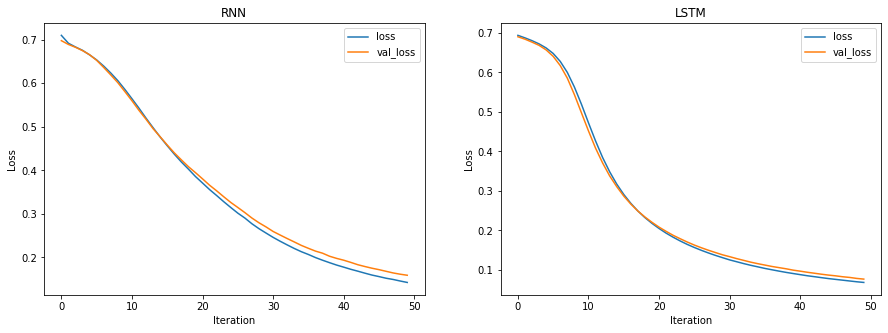

In [10]:
# Plot the losses
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
axes = axes.flatten()
for i, model, res in [(0, "RNN", rnn_res), (1, "LSTM", lstm_res)]:
    axes[i].plot(res.history["loss"], label="loss")
    axes[i].plot(res.history["val_loss"], label="val_loss")
    axes[i].set_xlabel("Iteration")
    axes[i].set_ylabel("Loss")
    axes[i].set_title(model)
    axes[i].legend()
plt.show()

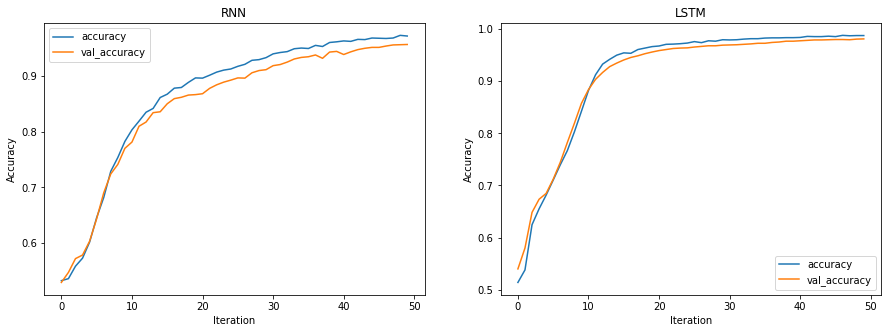

In [11]:
# Plot the accuracies
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
axes = axes.flatten()
for i, model, res in [(0, "RNN", rnn_res), (1, "LSTM", lstm_res)]:
    axes[i].plot(res.history["accuracy"], label="accuracy")
    axes[i].plot(res.history["val_accuracy"], label="val_accuracy")
    axes[i].set_xlabel("Iteration")
    axes[i].set_ylabel("Accuracy")
    axes[i].set_title(model)
    axes[i].legend()
plt.show()

Let's now move to Y_long

In [12]:
# Compile rnn
rnn.compile(
    loss="binary_crossentropy",
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=["accuracy"]
)

# Compile lstm
lstm.compile(
    loss="binary_crossentropy",
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=["accuracy"]
)

# Train rnn
rnn_res = rnn.fit(
    X, Y_long,
    epochs=100,
    validation_split=0.5
)

# Train lstm
inputs = np.expand_dims(X, -1)
lstm_res = lstm.fit(
    X, Y_long,
    epochs=100,
    validation_split=0.5
)

Epoch 1/100
79/79 [==============================] - 2s 7ms/step - loss: 1.6275 - accuracy: 0.4900 - val_loss: 1.4677 - val_accuracy: 0.5104
Epoch 2/100
79/79 [==============================] - 0s 5ms/step - loss: 1.3916 - accuracy: 0.4948 - val_loss: 1.1826 - val_accuracy: 0.5060
Epoch 3/100
79/79 [==============================] - 0s 4ms/step - loss: 1.0924 - accuracy: 0.4984 - val_loss: 1.0168 - val_accuracy: 0.5112
Epoch 4/100
79/79 [==============================] - 0s 4ms/step - loss: 0.9599 - accuracy: 0.5120 - val_loss: 0.9310 - val_accuracy: 0.5088
Epoch 5/100
79/79 [==============================] - 0s 4ms/step - loss: 0.8856 - accuracy: 0.5148 - val_loss: 0.8699 - val_accuracy: 0.5016
Epoch 6/100
79/79 [==============================] - 0s 4ms/step - loss: 0.8332 - accuracy: 0.5132 - val_loss: 0.8236 - val_accuracy: 0.5040
Epoch 7/100
79/79 [==============================] - 0s 4ms/step - loss: 0.7961 - accuracy: 0.5120 - val_loss: 0.7892 - val_accuracy: 0.4980
Epoch 8/100
7

Epoch 59/100
79/79 [==============================] - 0s 4ms/step - loss: 0.6823 - accuracy: 0.5508 - val_loss: 0.7036 - val_accuracy: 0.5092
Epoch 60/100
79/79 [==============================] - 0s 4ms/step - loss: 0.6831 - accuracy: 0.5464 - val_loss: 0.7032 - val_accuracy: 0.5080
Epoch 61/100
79/79 [==============================] - 0s 4ms/step - loss: 0.6820 - accuracy: 0.5556 - val_loss: 0.7031 - val_accuracy: 0.5124
Epoch 62/100
79/79 [==============================] - 0s 4ms/step - loss: 0.6816 - accuracy: 0.5528 - val_loss: 0.7031 - val_accuracy: 0.5120
Epoch 63/100
79/79 [==============================] - 0s 4ms/step - loss: 0.6818 - accuracy: 0.5492 - val_loss: 0.7056 - val_accuracy: 0.5064
Epoch 64/100
79/79 [==============================] - 0s 4ms/step - loss: 0.6820 - accuracy: 0.5528 - val_loss: 0.7025 - val_accuracy: 0.5092
Epoch 65/100
79/79 [==============================] - 0s 4ms/step - loss: 0.6811 - accuracy: 0.5588 - val_loss: 0.7035 - val_accuracy: 0.5024
Epoch 

Epoch 17/100
79/79 [==============================] - 0s 6ms/step - loss: 0.8442 - accuracy: 0.4984 - val_loss: 0.8146 - val_accuracy: 0.5080
Epoch 18/100
79/79 [==============================] - 0s 6ms/step - loss: 0.8068 - accuracy: 0.5080 - val_loss: 0.7853 - val_accuracy: 0.5048
Epoch 19/100
79/79 [==============================] - 0s 6ms/step - loss: 0.7794 - accuracy: 0.5040 - val_loss: 0.7627 - val_accuracy: 0.5048
Epoch 20/100
79/79 [==============================] - 0s 6ms/step - loss: 0.7585 - accuracy: 0.5024 - val_loss: 0.7458 - val_accuracy: 0.5020
Epoch 21/100
79/79 [==============================] - 0s 6ms/step - loss: 0.7439 - accuracy: 0.5028 - val_loss: 0.7342 - val_accuracy: 0.5052
Epoch 22/100
79/79 [==============================] - 0s 6ms/step - loss: 0.7335 - accuracy: 0.5040 - val_loss: 0.7253 - val_accuracy: 0.5040
Epoch 23/100
79/79 [==============================] - 0s 6ms/step - loss: 0.7258 - accuracy: 0.5040 - val_loss: 0.7190 - val_accuracy: 0.5048
Epoch 

Epoch 75/100
79/79 [==============================] - 0s 6ms/step - loss: 0.1492 - accuracy: 0.9452 - val_loss: 0.1528 - val_accuracy: 0.9424
Epoch 76/100
79/79 [==============================] - 1s 6ms/step - loss: 0.1434 - accuracy: 0.9492 - val_loss: 0.1532 - val_accuracy: 0.9412
Epoch 77/100
79/79 [==============================] - 0s 6ms/step - loss: 0.1472 - accuracy: 0.9448 - val_loss: 0.1492 - val_accuracy: 0.9424
Epoch 78/100
79/79 [==============================] - 1s 7ms/step - loss: 0.1422 - accuracy: 0.9460 - val_loss: 0.1485 - val_accuracy: 0.9452
Epoch 79/100
79/79 [==============================] - 1s 7ms/step - loss: 0.1473 - accuracy: 0.9472 - val_loss: 0.1444 - val_accuracy: 0.9460
Epoch 80/100
79/79 [==============================] - 1s 6ms/step - loss: 0.1386 - accuracy: 0.9500 - val_loss: 0.1433 - val_accuracy: 0.9468
Epoch 81/100
79/79 [==============================] - 0s 6ms/step - loss: 0.1331 - accuracy: 0.9524 - val_loss: 0.1400 - val_accuracy: 0.9460
Epoch 

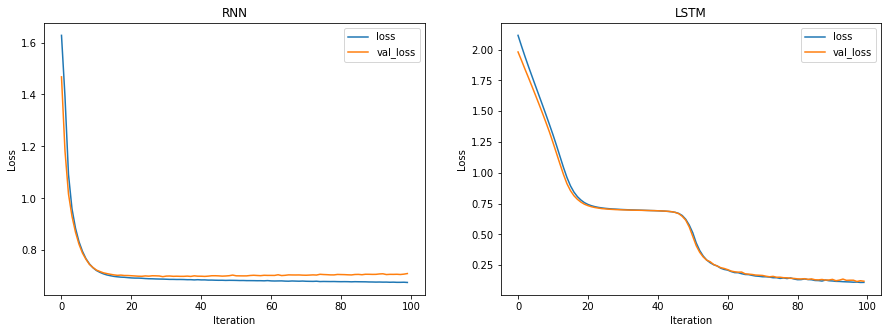

In [13]:
# Plot the losses
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
axes = axes.flatten()
for i, model, res in [(0, "RNN", rnn_res), (1, "LSTM", lstm_res)]:
    axes[i].plot(res.history["loss"], label="loss")
    axes[i].plot(res.history["val_loss"], label="val_loss")
    axes[i].set_xlabel("Iteration")
    axes[i].set_ylabel("Loss")
    axes[i].set_title(model)
    axes[i].legend()
plt.show()

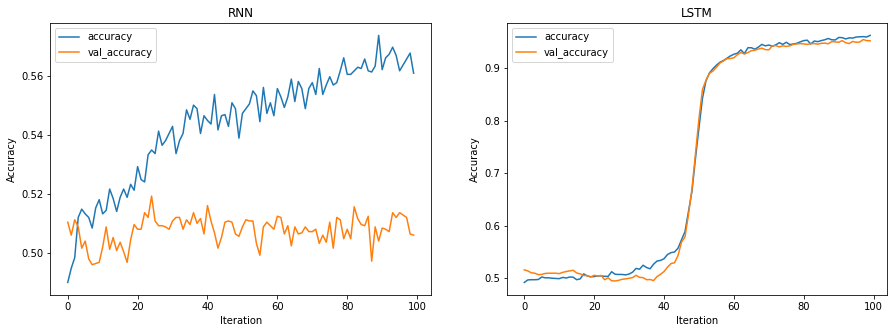

In [14]:
# Plot the accuracies
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
axes = axes.flatten()
for i, model, res in [(0, "RNN", rnn_res), (1, "LSTM", lstm_res)]:
    axes[i].plot(res.history["accuracy"], label="accuracy")
    axes[i].plot(res.history["val_accuracy"], label="val_accuracy")
    axes[i].set_xlabel("Iteration")
    axes[i].set_ylabel("Accuracy")
    axes[i].set_title(model)
    axes[i].legend()
plt.show()

Even if it struggles a lot, the LSTM at the end manages to figure out the labelling strategy and the loss and the accuracy converge. The RNN exhibits a different behaviour, not being able to guess the long distance memory pattern.